## 1. 기본 Line Plot
Line plot의 여러가지 요소와 테크닉을 알아보자

### 1.1 Line plot이란
- Line Plot은 연속적으로 변화하는 값을 순서대로 점으로 나타내고 선으로 연결한 그래프


- 꺾은선 그래프, 선 그래프, line chart, line graph등의 이름으로 사용됨


- 시간/순서에 대한 변화에 적합하여 추세를 살피기 위해 사용
    - 시계열 분석에 특화
    
    
- .line이 아닌 `.plot()`을 사용

### 1.2 Line plot의 요소
- 5개 이하의 선을 사용하는 것을 추천
    - 더 많은 선은 중첩으로 인한 가독성 하락
    
    
    
- 선을 구별하는 요소
    1. 색상(color)
    2. 마커(marker, markersize)
    3. 선의 종류(linestyle, linewidth)

### 1.3 Line plot을 위한 전처리
- 시시각각 변동하는 데이터는 Noise로 인해 패턴 및 추세 파악이 어려움
- Noise의 인지적인 방해를 줄이기 위해 smoothing을 사용

## 2. 정확한 Line plot

### 2.1 추세에 집중
- Bar plot과 다르게 꼭 축을 0에 초점을 둘 필요는 없다.
     - 추세를 보기 위한 목적이므로
     
     
- 너무 구체적인 line plot 보다는 생략된 line plot이 더 나을 수 있다.
    - Grid, Annotate등 모두 제거
    - 디에일한 정보는 표로 제공하는 것을 추천
    

- 생략되지 않는 선에서 범위를 조정하여 변화율 관찰(`.set_ylim()`)

### 2.2 간격
- 규칙적인 간격이 아니라면 오해를 줄 수 있다!
    - 그래프 상에서 규칙적일 때 : 기울기 정보의 오해
    - 그래프 상에서 간격이 다를 때 : 없는 데이터에 대해 있다고 오해


- 규칙적인 간격의 데이터가 아니라면 각 관측 값에 점으로 표시하여 오해를 줄이는 것이 좋다.

### 2.3 보간(점을 잇는법)
- Line은 점을 이어 만드는 요소. $\rightarrow$ 점과 점 사이에 데이터가 없기에 이를 잇는 방법(보간)


- 데이터의 error나 noise가 포함되어 있는 경우, 데이터의 이해를 돕는 방법
    - Moving Average
    - Smooth Curve with Scipy
        - `scipy.interpolate.make_interp_spline()`
        - `scipy.interpolate.interp1d()`
        - `scipy.ndimage.gaussian_filter1d()`
        
        
- Presentation에는 좋은 방법일 수 있으나
    - 없는 데이터를 있다고 생각할 수 있고
    - 작은 차이를 없앨 수 있어
    - 일반적인 분석에서는 지양해야한다.

### 2.4 이중 축 사용
- 한 plot에 대해 2개의 축을 __이중 축(dual axis)__ 라고 한다.


- 같은 시간 축에 대해 서로 다른 종류의 데이터를 표현하기 위해서 축이 2개가 필요
    - `.twinx()`를 사용
    
    
- 한 데이터에 대해 다른 단위(radian, degree등)    
    - `.secondary_xaxis()`, `.secondary_yaxis()` 사용
    
    
- 2개의 plot을 그리는 것 >>>>이중 축 사용
    - 이중 축은 지양하는 것이 좋다


### 2.5 ETC
- 라인 끝 단에 레이블을 추가하면 식별에 도움(범례 보다)
- Min/Max 정보(또는 원하는 포인트)는 추가해주면 도움이 된다(annatation)
- 보다 연한 색을 사용하여 uncertainty 표현 가능(신뢰구간, 분산 등)

___
# 실습

# Line Plot 사용하기

## 1. 기본 Line Plot

### 1-1. plot() 기본

- `.plot()` : .line()이 아니라는 점!

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

plot은 $x_1, x_2, \cdots$, $y_1, y_2, \cdots$ 데이터를 사용해서 그립니다.

line plot은 왼쪽에서 오른쪽으로 그리는 게 일반적이지만 문법 자체는 이전 점 $(x_1, y_1)$에서 $(x_2, y_2)$로 잇고, $(x_2, y_2)$에서 $(x_3, y_3)$로 잇는 순차적인 선으로 구성된 그래프입니다.

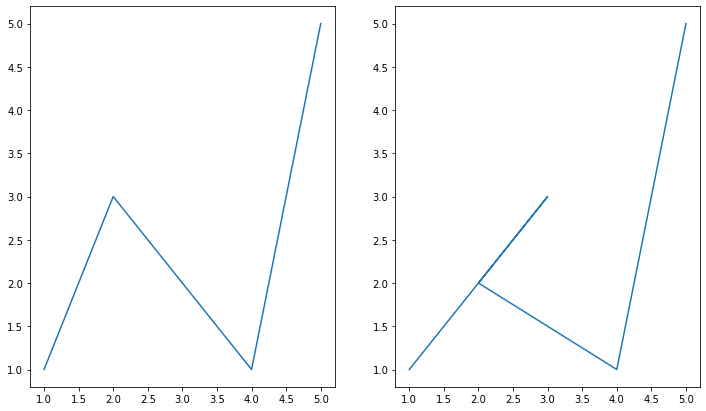

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7))

x1 = [1, 2, 3, 4, 5]
x2 = [1, 3, 2, 4, 5]
y = [1, 3, 2, 1, 5]

axes[0].plot(x1, y)
axes[1].plot(x2, y)

plt.show()

좀 더 테크닉을 사용하면 다음과 같이 정N각형이나 원을 그릴 수도 있습니다.

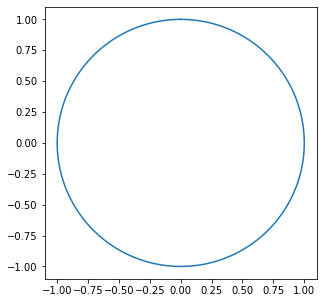

In [11]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, aspect=1)

n = 1000
x = np.sin(np.linspace(0, 2*np.pi, n))
y = np.cos(np.linspace(0, 2*np.pi, n))

ax.plot(x, y)

plt.show()

### 1-2. plot 변형하기

가볍게 랜덤한 데이터를 사용해서 그래프의 요소를 변경해보겠습니다.

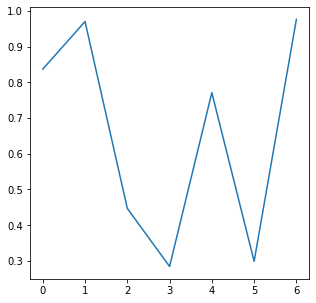

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

np.random.seed(97)
x = np.arange(7)
y = np.random.rand(7)

ax.plot(x, y)

plt.show()

3가지 요소를 변경하며 감을 잡아봅시다.

- **색(color)**
- **마커(marker)** : [마커의 종류](https://matplotlib.org/stable/api/markers_api.html)
- **선의 종류(linestyle)** : `solid`, `dashed`, `dashdot`, `dotted`, `None`, 

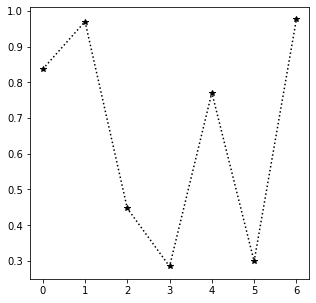

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

np.random.seed(97)
x = np.arange(7)
y = np.random.rand(7)

ax.plot(x, y,
        color='black',
        marker='*',
        linestyle=':', # :,--, dashed, dashdot 등
       )

plt.show()

### 1-3. Line plot을 위한 전처리

우선 시계열 데이터를 받아보겠습니다. 

미국 주식 데이터셋입니다. 

- [New York Stock Exchange](https://www.kaggle.com/dgawlik/nyse)

In [33]:
stock = pd.read_csv('./prices.csv')
stock

# string을 pandas의 datetime을 이용해 시간으로 변경
stock['date'] = pd.to_datetime(stock['date'], format='%Y-%m-%d', errors='raise')
stock.set_index("date", inplace = True)


In [44]:
# FAANG
apple = stock[stock['symbol']=='AAPL']
google = stock[stock['symbol']=='GOOGL']
meta = stock[stock['symbol']=='FB']
amazon = stock[stock['symbol']=='AMZN']

amazon.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,AMZN,136.250000,133.899994,133.139999,136.610001,7599900.0
2010-01-05,AMZN,133.429993,134.690002,131.809998,135.479996,8851900.0
2010-01-06,AMZN,134.600006,132.250000,131.649994,134.729996,7178800.0
2010-01-07,AMZN,132.009995,130.000000,128.800003,132.320007,11030200.0
2010-01-08,AMZN,130.559998,133.520004,129.029999,133.679993,9830500.0


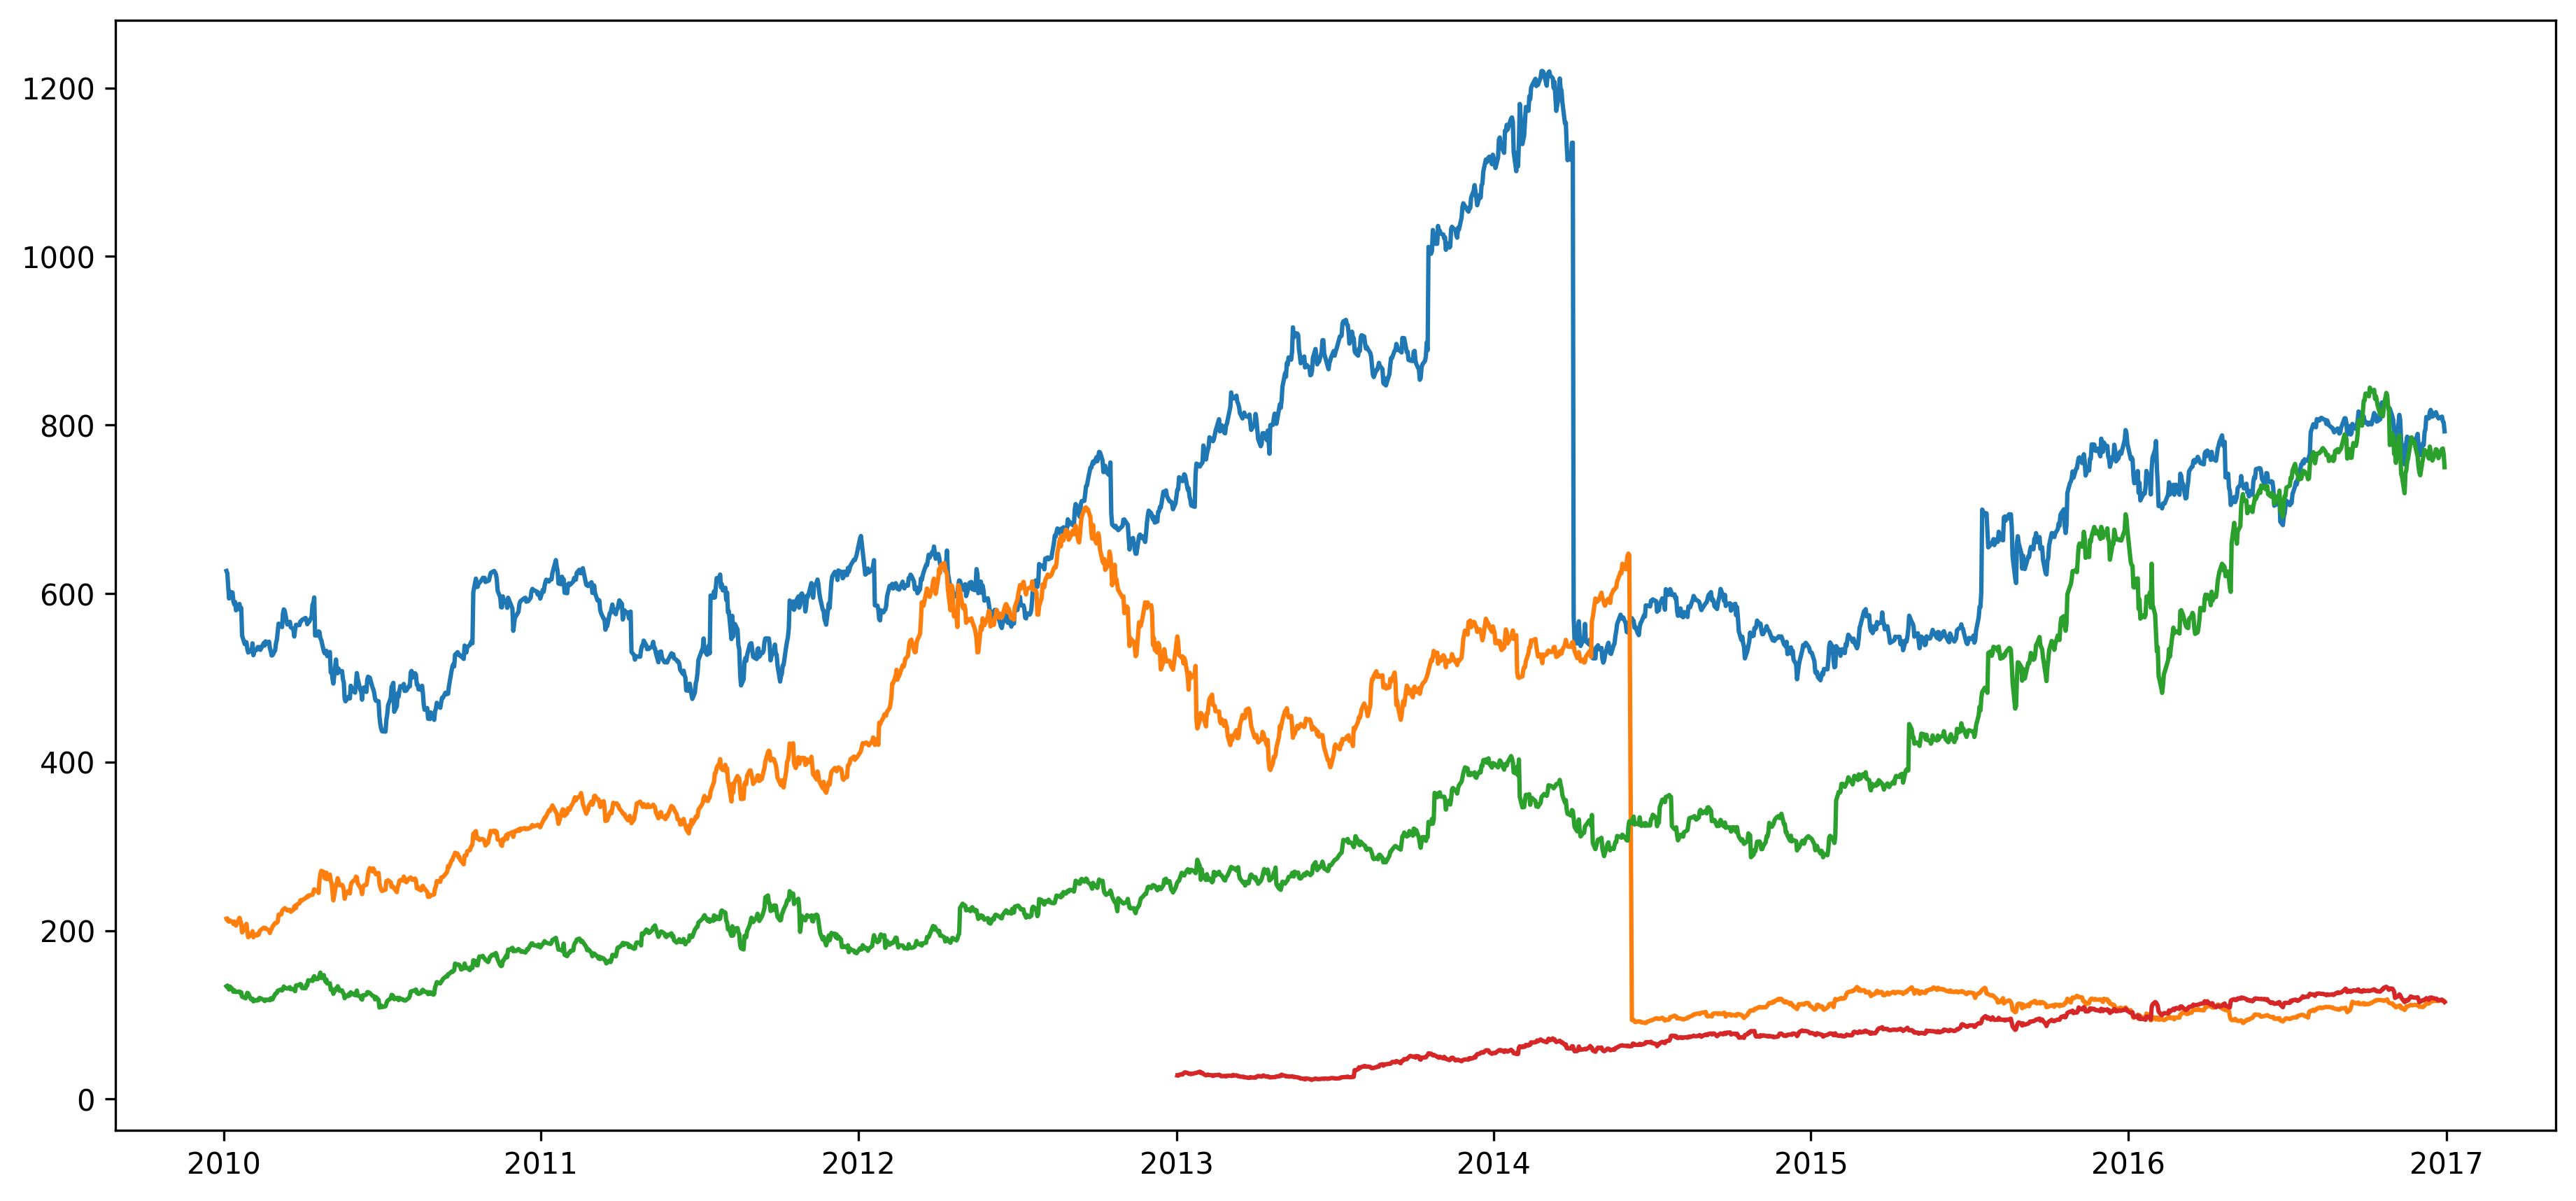

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7), dpi=300)

ax.plot(google.index, google['close'])
ax.plot(apple.index, apple['close'])
ax.plot(amazon.index, amazon['close'])
ax.plot(meta.index, meta['close'])

plt.show()

이동평균을 사용해보겠습니다.(시계열 데이터는 noise가 많다)

In [49]:
# 반복문보다는 pandas의 rolling을 사용
google_rolling = google.rolling(window=10).mean()
google_rolling.head(7)

/var/folders/3b/rtm0n0l56yd2mbcz2vh1106r0000gn/T/ipykernel_34003/775473492.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['symbol'], dtype='object')
  google_rolling = google.rolling(window=10).mean()


,open,close,low,high,volume
date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN
2010-01-11,NaN,NaN,NaN,NaN,NaN
2010-01-12,NaN,NaN,NaN,NaN,NaN


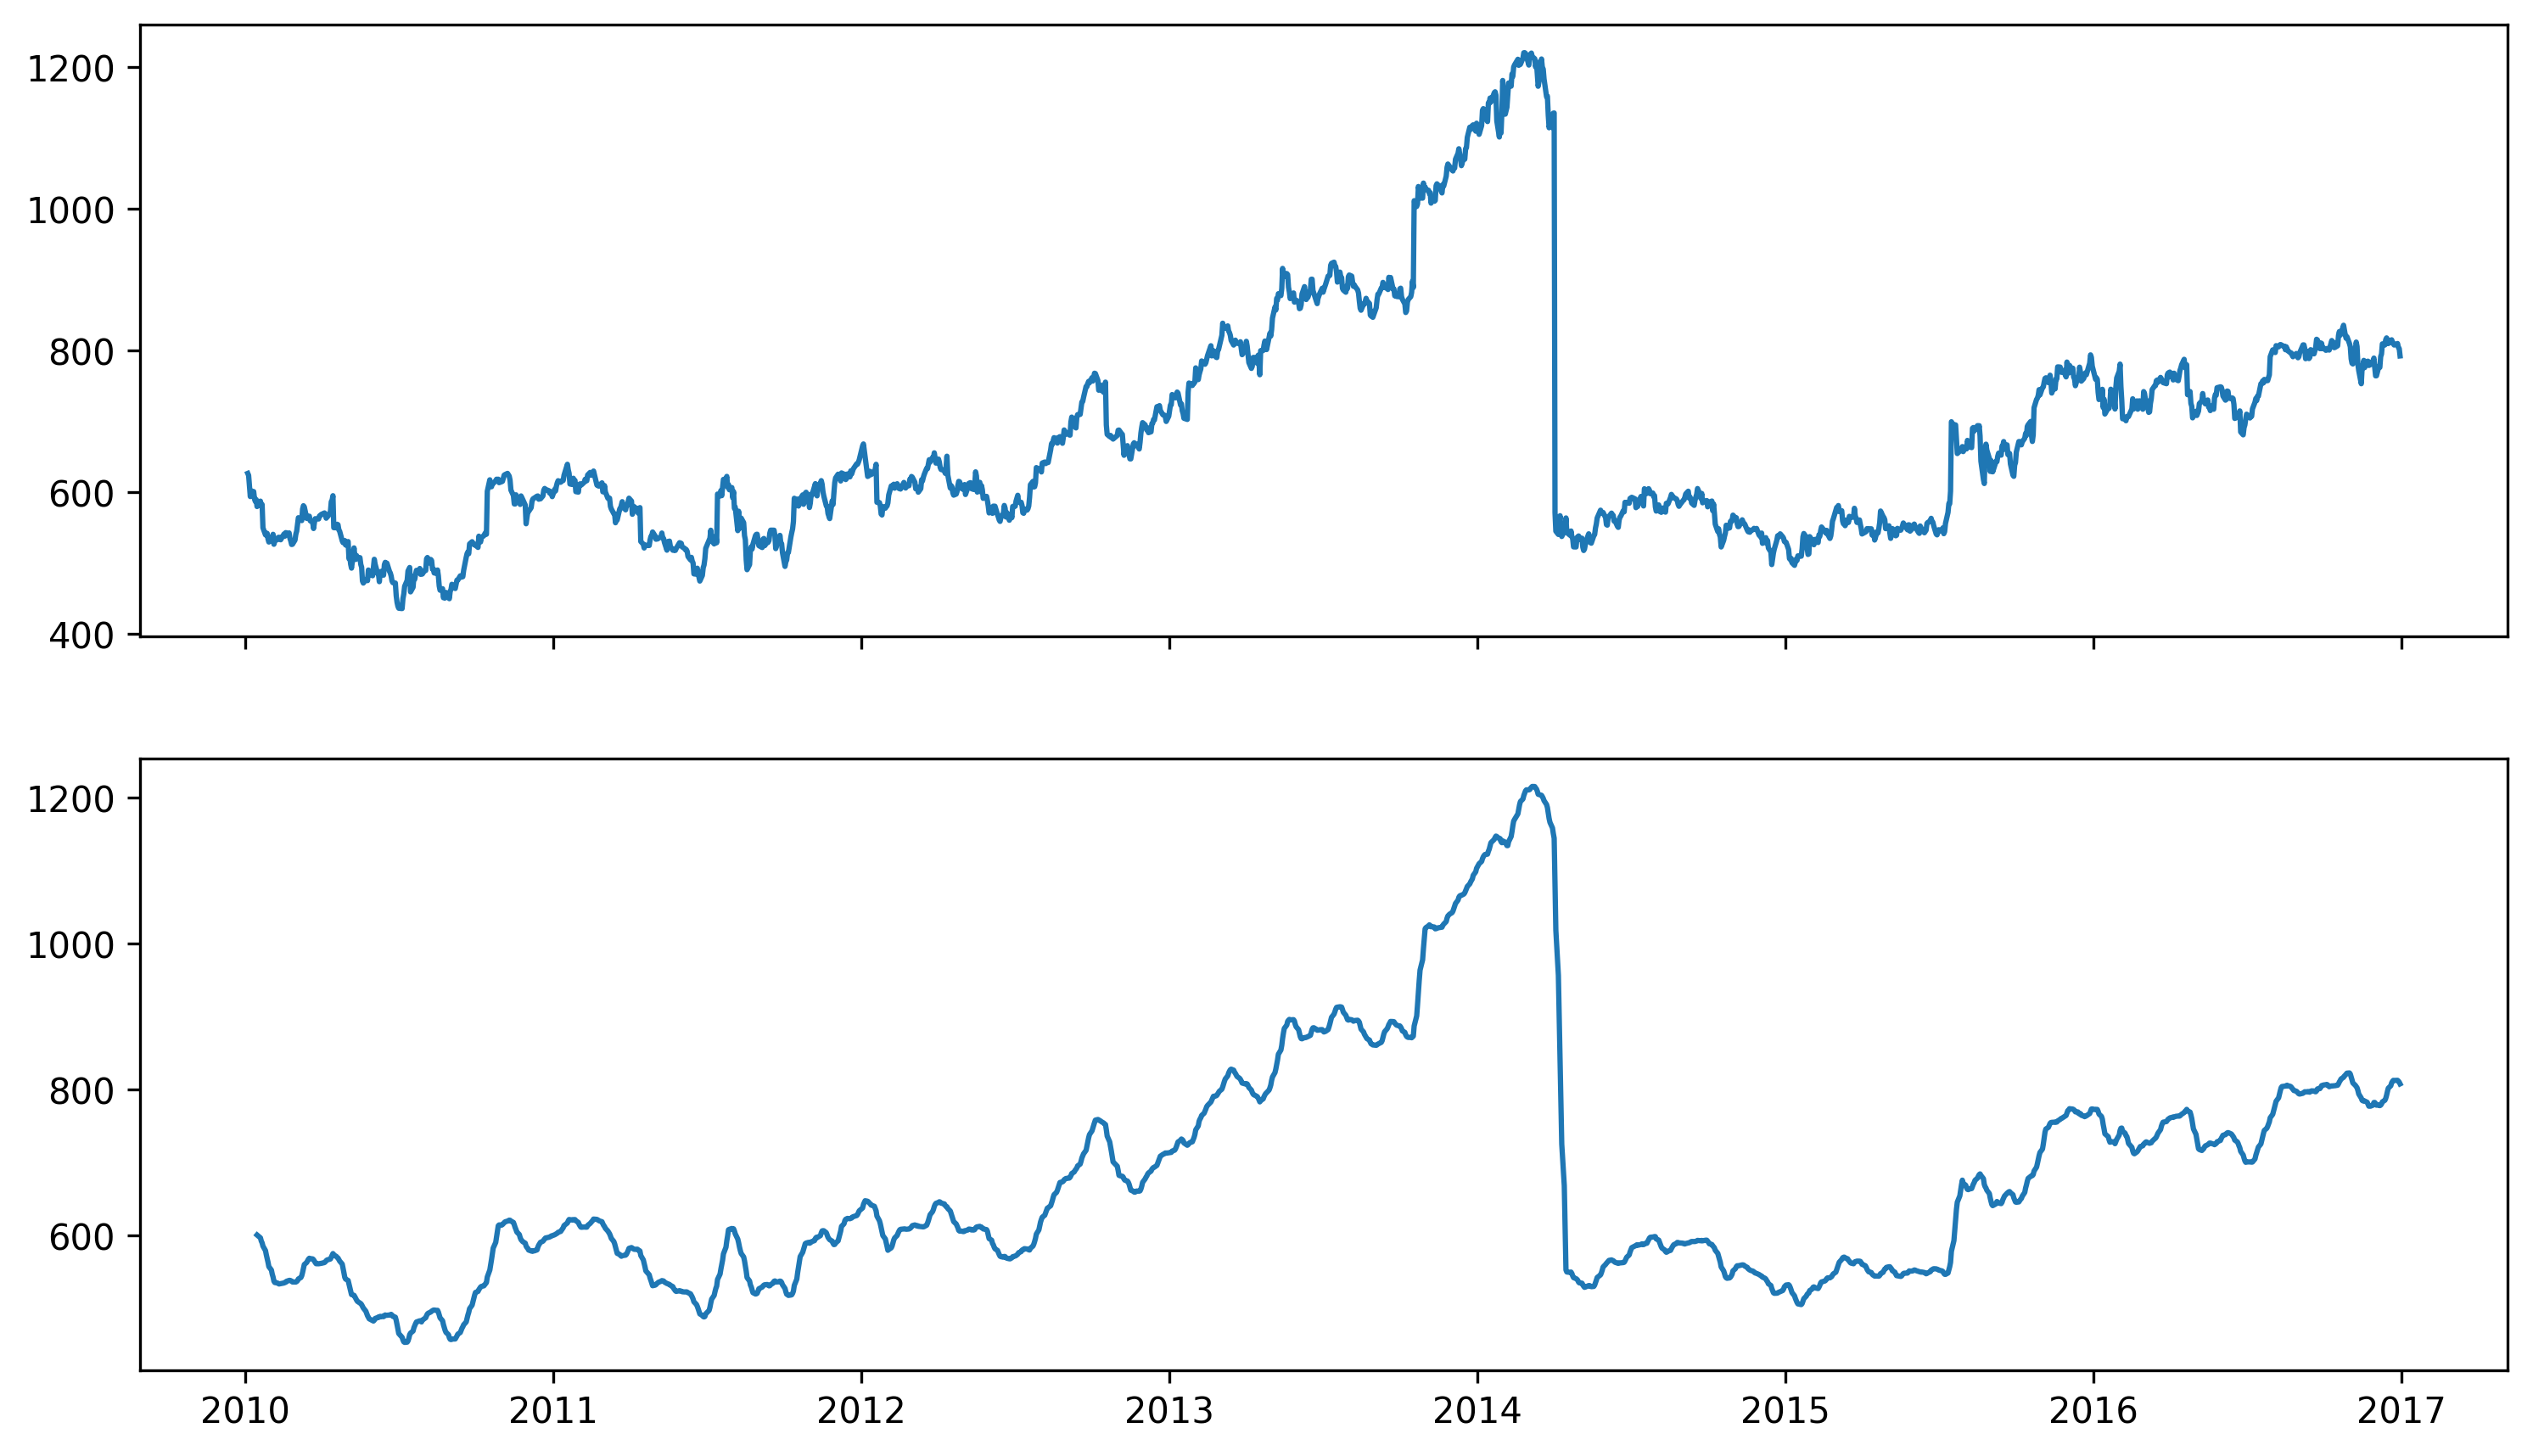

In [50]:
fig, axes = plt.subplots(2, 1, figsize=(12, 7), dpi=300, sharex=True)

axes[0].plot(google.index,google['close'])
axes[1].plot(google_rolling.index,google_rolling['close'])

plt.show()

## 2. 정확한 Line Plot


### 2.1 추세에 집중 

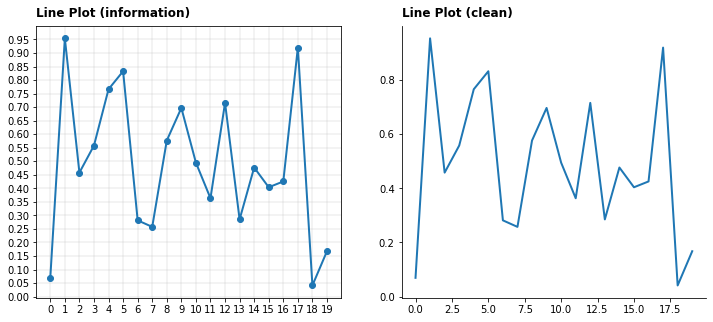

In [51]:
from matplotlib.ticker import MultipleLocator

fig = plt.figure(figsize=(12, 5))

# random 데이터
np.random.seed(970725)

x = np.arange(20)
y = np.random.rand(20)


# Ax1
ax1 = fig.add_subplot(121)
ax1.plot(x, y,
         marker='o',
         linewidth=2)

ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_major_locator(MultipleLocator(0.05))    
ax1.grid(linewidth=0.3)    


# Ax2
ax2 = fig.add_subplot(122)
ax2.plot(x, y,
       linewidth=2,)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)




ax1.set_title(f"Line Plot (information)", loc='left', fontsize=12, va= 'bottom', fontweight='semibold')
ax2.set_title(f"Line Plot (clean)", loc='left', fontsize=12, va= 'bottom', fontweight='semibold')


plt.show()

### 2-2. 간격 

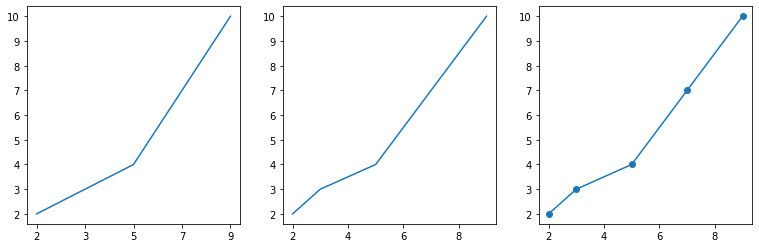

In [54]:
x = [2, 3, 5, 7, 9]
y = [2, 3, 4, 7, 10]

fig, ax = plt.subplots(1, 3, figsize=(13, 4))
ax[0].plot([str(i) for i in x], y)
ax[1].plot(x, y)
ax[2].plot(x, y, marker='o')

plt.show()

### 2-3. 보간

- https://www.delftstack.com/howto/matplotlib/matplotlib-plot-smooth-curve/

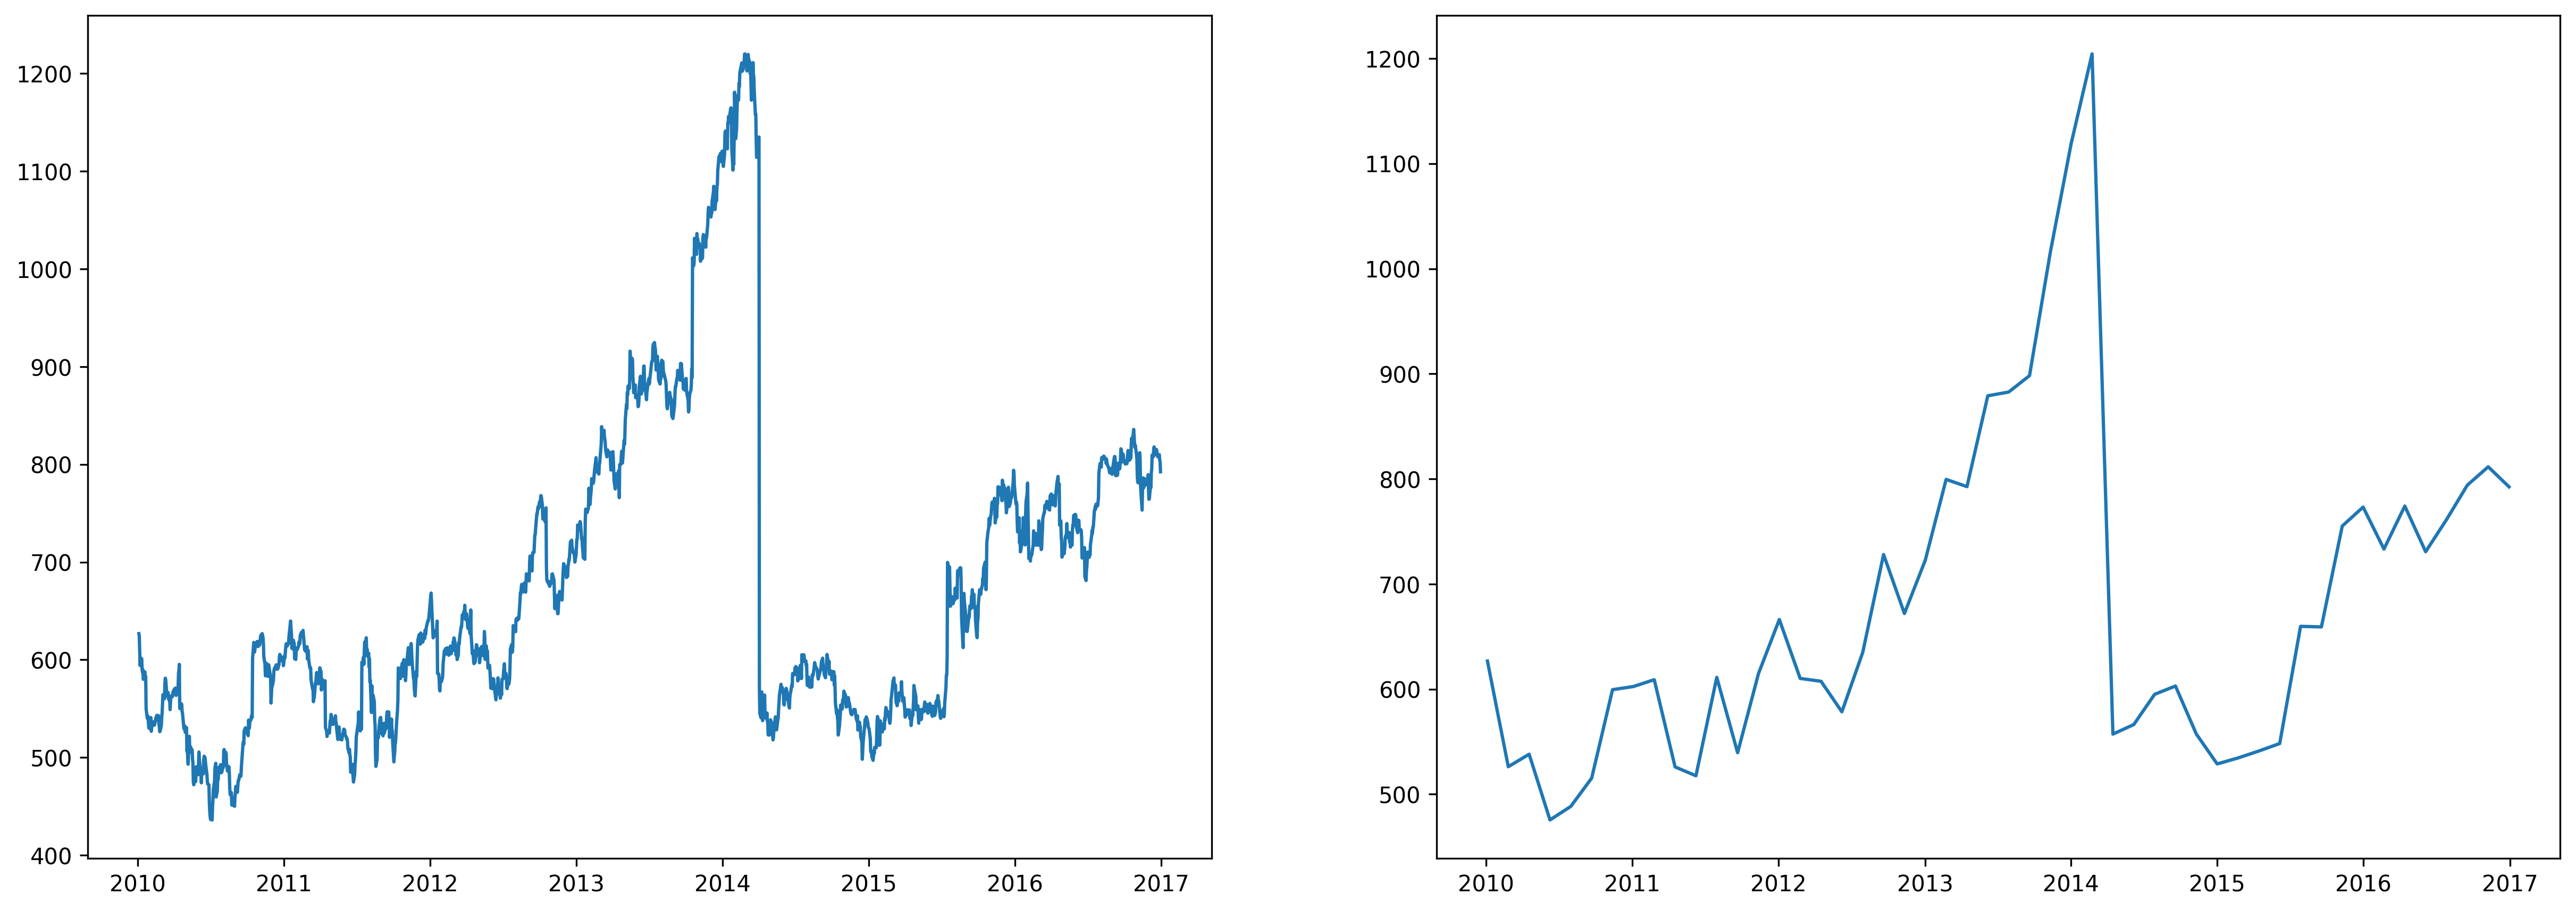

In [55]:
from scipy.interpolate import make_interp_spline, interp1d
import matplotlib.dates as dates

fig, ax = plt.subplots(1, 2, figsize=(20, 7), dpi=300)

date_np = google.index
value_np = google['close']

date_num = dates.date2num(date_np)

# smoothing 해준다(이동 평균이랑 비슷)
date_num_smooth = np.linspace(date_num.min(), date_num.max(), 50) 
spl = make_interp_spline(date_num, value_np, k=3)
value_np_smooth = spl(date_num_smooth)

# print
ax[0].plot(date_np, value_np)
ax[1].plot(dates.num2date(date_num_smooth), value_np_smooth)

plt.show()

### 2-4. 이중 축 사용

- `twinx()` 사용하기

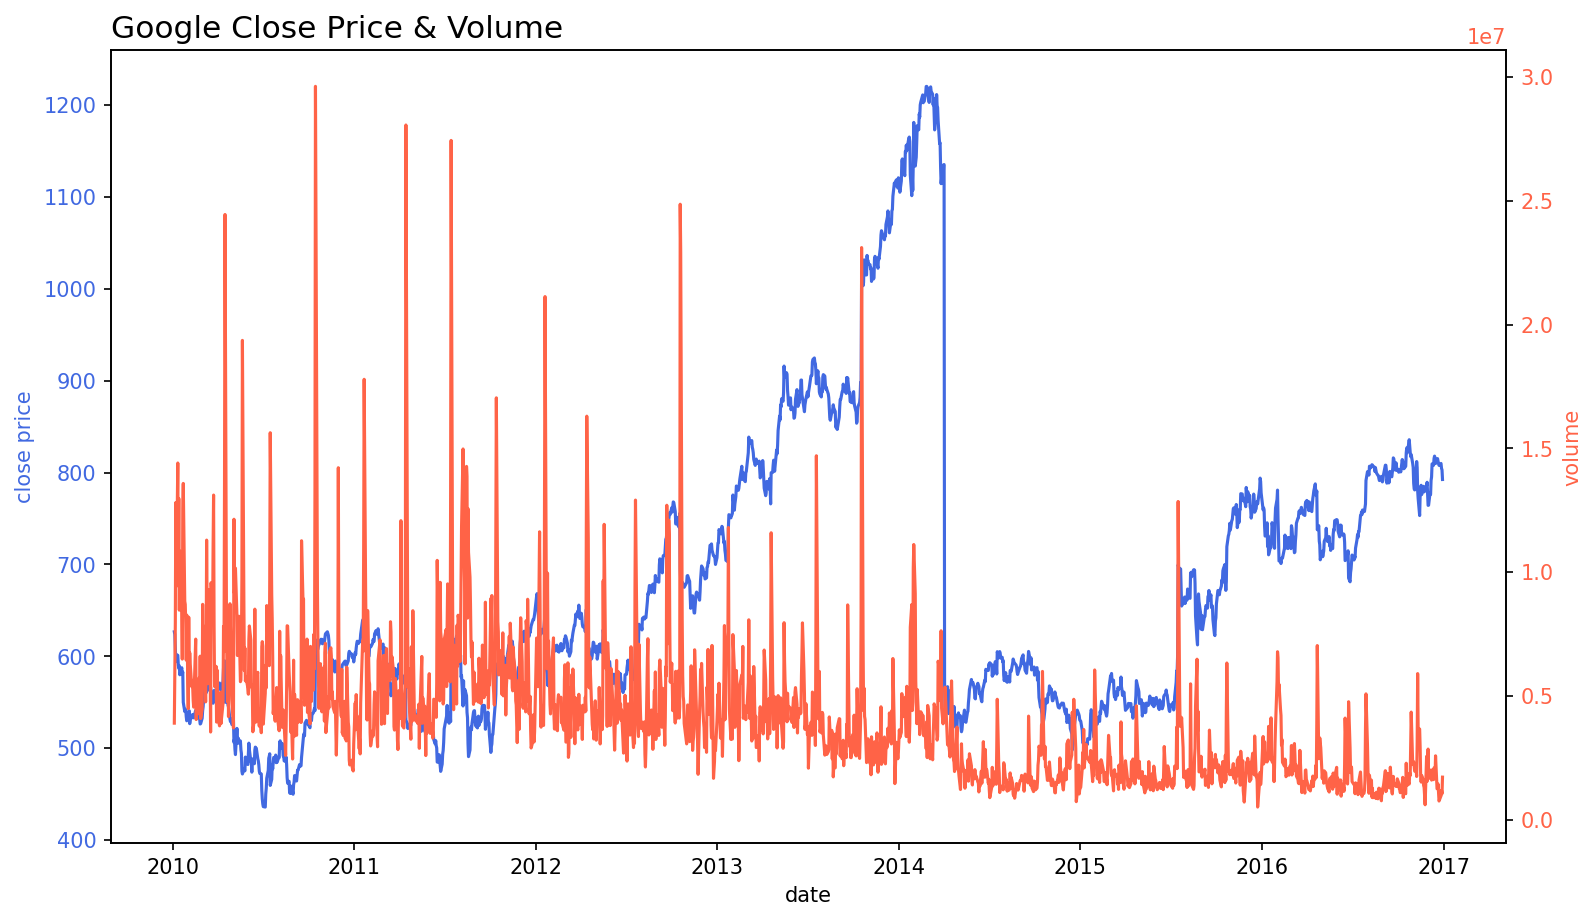

In [58]:
fig, ax1 = plt.subplots(figsize=(12, 7), dpi=150)

# First Plot
color = 'royalblue'

ax1.plot(google.index, google['close'], color=color)
ax1.set_xlabel('date')
ax1.set_ylabel('close price', color=color)  
ax1.tick_params(axis='y', labelcolor=color)

# # Second Plot
ax2 = ax1.twinx()  
color = 'tomato'

ax2.plot(google.index, google['volume'], color=color)
ax2.set_ylabel('volume', color=color)  
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title('Google Close Price & Volume', loc='left', fontsize=15)
plt.show()

[ `secondary-xaxis()` ](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/secondary_axis.html) : 단위가 다를 때 사용

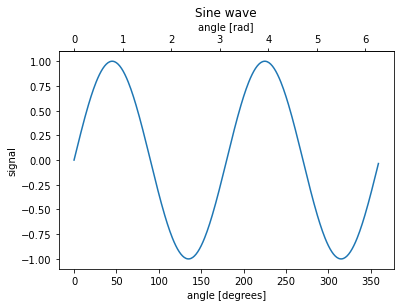

In [63]:
def deg2rad(x):
    return x * np.pi / 180

def rad2deg(x):
    return x * 180 / np.pi

fig, ax = plt.subplots()
x = np.arange(0, 360)
y = np.sin(2 * x * np.pi / 180)
ax.plot(x, y)
ax.set_xlabel('angle [degrees]')
ax.set_ylabel('signal')
ax.set_title('Sine wave')
secax = ax.secondary_xaxis('top', functions=(deg2rad, rad2deg))
secax.set_xlabel('angle [rad]')
plt.show()

### 2-5. ETC

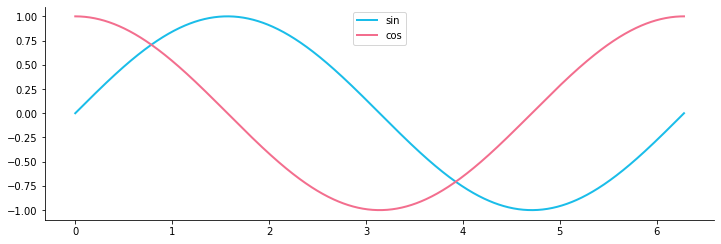

In [64]:
fig = plt.figure(figsize=(12, 5))

x = np.linspace(0, 2*np.pi, 1000)
y1 = np.sin(x)
y2 = np.cos(x)


ax = fig.add_subplot(111, aspect=1)
ax.plot(x, y1,
       color='#1ABDE9',
       linewidth=2, label='sin')

ax.plot(x, y2,
       color='#F36E8E',
       linewidth=2, label='cos')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(loc='upper center')

plt.show()

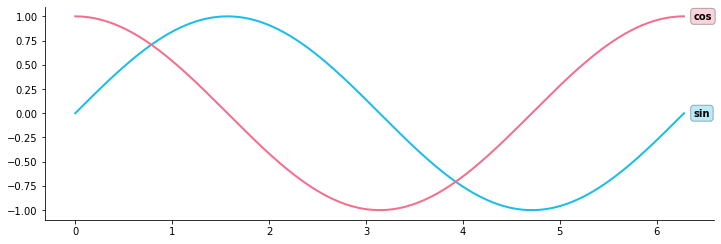

In [65]:

fig = plt.figure(figsize=(12, 5))

x = np.linspace(0, 2*np.pi, 1000)
y1 = np.sin(x)
y2 = np.cos(x)

# Ax2
ax = fig.add_subplot(111, aspect=1)
ax.plot(x, y1,
       color='#1ABDE9',
       linewidth=2,)

ax.plot(x, y2,
       color='#F36E8E',
       linewidth=2,)

ax.text(x[-1]+0.1, y1[-1], s='sin', fontweight='bold',
         va='center', ha='left', 
         bbox=dict(boxstyle='round,pad=0.3', fc='#1ABDE9', ec='black', alpha=0.3))

ax.text(x[-1]+0.1, y2[-1], s='cos', fontweight='bold',
         va='center', ha='left', 
         bbox=dict(boxstyle='round,pad=0.3', fc='#F36E8E', ec='black', alpha=0.3))


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

#### max/min 보여주기

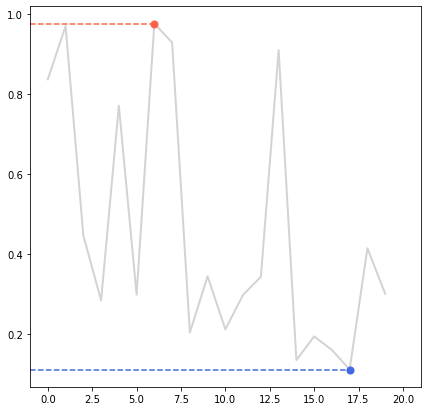

In [66]:
fig = plt.figure(figsize=(7, 7))

np.random.seed(97)

x = np.arange(20)
y = np.random.rand(20)

ax = fig.add_subplot(111)
ax.plot(x, y,
       color='lightgray',
       linewidth=2,)

ax.set_xlim(-1, 21)

# max
ax.plot([-1, x[np.argmax(y)]], [np.max(y)]*2,
        linestyle='--', color='tomato'
       )

ax.scatter(x[np.argmax(y)], np.max(y), 
            c='tomato',s=50, zorder=20)

# min
ax.plot([-1, x[np.argmin(y)]], [np.min(y)]*2,
        linestyle='--', color='royalblue'
       )
ax.scatter(x[np.argmin(y)], np.min(y), 
            c='royalblue',s=50, zorder=20)

plt.show()